In [1]:
import io
import msprime
import numpy as np
import tskit

In [2]:
import sys
if not any(['tskit-ld-proto' in s for s in sys.path]):
    sys.path.append('/home/lkirk/repo/tskit-ld-proto')

In [3]:
from tskit_ld_proto.ld_proto import (
    compute_stat_matrix,
    compute_D,
    compute_r2,
    paper_ex_ts
)

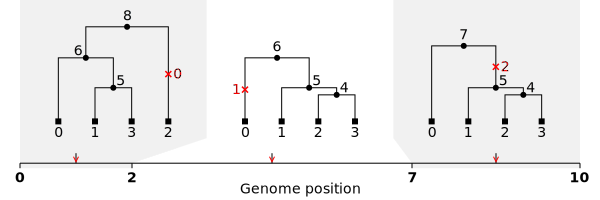

In [4]:
paper_ex_ts.draw_svg()

In [5]:
paper_ex_ld_calc = tskit.LdCalculator(paper_ex_ts)
paper_ex_ld_calc.get_r2_matrix()

array([[1.        , 0.11111111, 0.11111111],
       [0.11111111, 1.        , 1.        ],
       [0.11111111, 1.        , 1.        ]])

In [6]:
compute_stat_matrix(paper_ex_ts, compute_r2)

array([[1.        , 0.11111111, 0.11111111],
       [0.11111111, 1.        , 1.        ],
       [0.11111111, 1.        , 1.        ]])

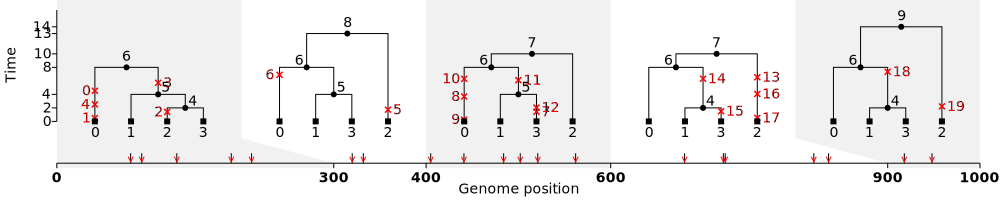

In [7]:
nodes = """\
id      is_sample   time
0       1           0
1       1           0
2       1           0
3       1           0
4       0           2
5       0           4
6       0           8
7       0           10
8       0           13
9       0           14
"""

edges = """\
left    right   parent  child
0       300     4       2,3
600     1000    4       1,3
0       600     5       1
0       300     5       4
300     600     5       3
0       1000    6       0
0       600     6       5
600     1000    6       4
300     400     8       2,6
400     900     7       2,6
900     1000    9       2,6
"""

# simulate the tree sequence with tskit
ts = tskit.load_text(
    nodes=io.StringIO(nodes), edges=io.StringIO(edges), strict=False
)

# simulate mutations over tree sequence 
# mts = msprime.sim_mutations(ts, rate=.001, random_seed=678)
ts = msprime.sim_mutations(ts, rate=.0008, random_seed=678)

# draw the tree sequence with mutations 
ts.draw_svg(y_axis=True)

In [8]:
compute_stat_matrix(ts, compute_D).min(), compute_stat_matrix(ts, compute_D).max()

(-0.1875, 0.25)

In [9]:
ld_calc = tskit.LdCalculator(ts)
ld_calc.get_r2_matrix()

array([[1.        , 1.        , 0.11111111, 1.        , 1.        ,
        0.11111111, 1.        , 0.11111111, 1.        , 1.        ,
        1.        , 0.33333333, 0.11111111, 0.11111111, 0.33333333,
        0.11111111, 0.11111111, 0.11111111, 0.33333333, 0.11111111],
       [1.        , 1.        , 0.11111111, 1.        , 1.        ,
        0.11111111, 1.        , 0.11111111, 1.        , 1.        ,
        1.        , 0.33333333, 0.11111111, 0.11111111, 0.33333333,
        0.11111111, 0.11111111, 0.11111111, 0.33333333, 0.11111111],
       [0.11111111, 0.11111111, 1.        , 0.11111111, 0.11111111,
        1.        , 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.33333333, 0.11111111, 1.        , 0.33333333,
        0.11111111, 1.        , 1.        , 0.33333333, 1.        ],
       [1.        , 1.        , 0.11111111, 1.        , 1.        ,
        0.11111111, 1.        , 0.11111111, 1.        , 1.        ,
        1.        , 0.33333333, 0.11111111, 0

In [10]:
compute_stat_matrix(ts, compute_r2)

array([[1.        , 1.        , 0.11111111, 1.        , 1.        ,
        0.11111111, 1.        , 0.11111111, 1.        , 1.        ,
        1.        , 0.33333333, 0.11111111, 0.11111111, 0.33333333,
        0.11111111, 0.11111111, 0.11111111, 0.33333333, 0.11111111],
       [1.        , 1.        , 0.11111111, 1.        , 1.        ,
        0.11111111, 1.        , 0.11111111, 1.        , 1.        ,
        1.        , 0.33333333, 0.11111111, 0.11111111, 0.33333333,
        0.11111111, 0.11111111, 0.11111111, 0.33333333, 0.11111111],
       [0.11111111, 0.11111111, 1.        , 0.11111111, 0.11111111,
        1.        , 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.33333333, 0.11111111, 1.        , 0.33333333,
        0.11111111, 1.        , 1.        , 0.33333333, 1.        ],
       [1.        , 1.        , 0.11111111, 1.        , 1.        ,
        0.11111111, 1.        , 0.11111111, 1.        , 1.        ,
        1.        , 0.33333333, 0.11111111, 0

In [11]:
(ld_calc.get_r2_matrix() == compute_stat_matrix(ts, compute_r2)).all()

True

In [12]:
compute_stat_matrix(ts, compute_D)

array([[ 0.1875,  0.1875, -0.0625, -0.1875,  0.1875, -0.0625,  0.1875,
        -0.0625,  0.1875,  0.1875,  0.1875, -0.125 , -0.0625, -0.0625,
        -0.125 , -0.0625, -0.0625, -0.0625, -0.125 , -0.0625],
       [ 0.1875,  0.1875, -0.0625, -0.1875,  0.1875, -0.0625,  0.1875,
        -0.0625,  0.1875,  0.1875,  0.1875, -0.125 , -0.0625, -0.0625,
        -0.125 , -0.0625, -0.0625, -0.0625, -0.125 , -0.0625],
       [-0.0625, -0.0625,  0.1875,  0.0625, -0.0625,  0.1875, -0.0625,
        -0.0625, -0.0625, -0.0625, -0.0625, -0.125 , -0.0625,  0.1875,
        -0.125 , -0.0625,  0.1875,  0.1875, -0.125 ,  0.1875],
       [-0.1875, -0.1875,  0.0625,  0.1875, -0.1875,  0.0625, -0.1875,
         0.0625, -0.1875, -0.1875, -0.1875,  0.125 ,  0.0625,  0.0625,
         0.125 ,  0.0625,  0.0625,  0.0625,  0.125 ,  0.0625],
       [ 0.1875,  0.1875, -0.0625, -0.1875,  0.1875, -0.0625,  0.1875,
        -0.0625,  0.1875,  0.1875,  0.1875, -0.125 , -0.0625, -0.0625,
        -0.125 , -0.0625, -0.0625, -0.

In [8]:
compute_stat_matrix(ts, compute_D).min(), compute_stat_matrix(ts, compute_D).max()

(-0.1875, 0.25)